In [1]:
#import bibliotek
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#wczytywanie DF z linku https://we.tl/t-yDSAPEXRdB

#DF=pd.read_csv('/home/nina/Infoshare - zadanka/kickstarter/kickstarter_public_kickstarter_filtered.tsv',sep='\t')
DF = pd.read_csv('kickstarter_public_kickstarter_filtered.tsv',sep='\t')
DF.head()

#utworzenie nowej kolumny gdzie mamy kategorie wraz z podkategoriami
DF['main_category_and_category']=DF['main_category']+' '+DF['category']

#zmiana czcionki  na wykresach
plt.rcParams.update({'font.size': 16})

Histogram głównych kategorii

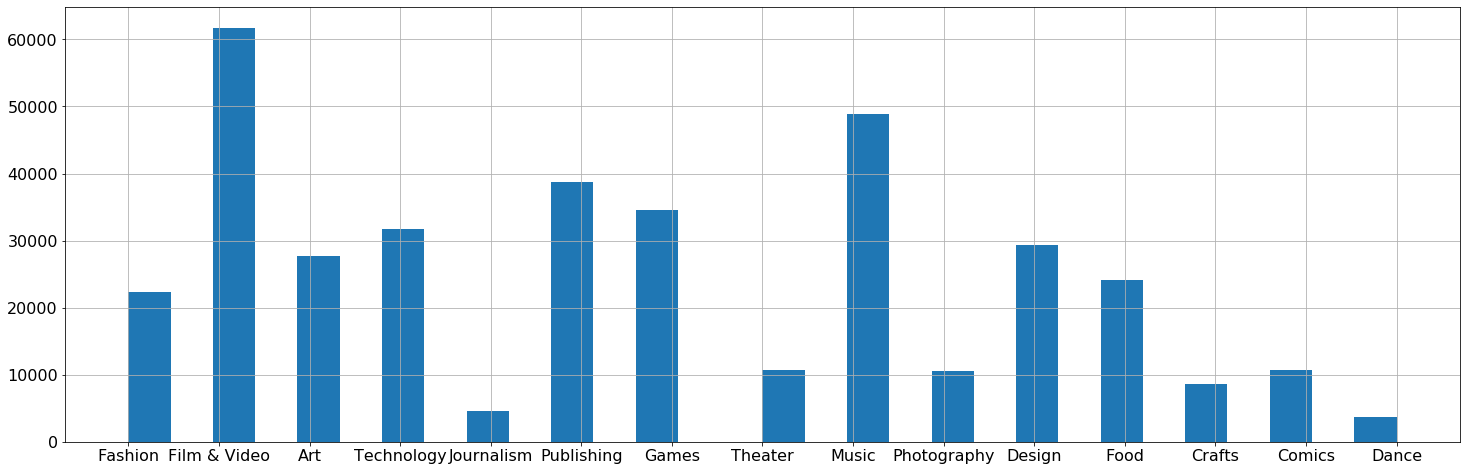

In [3]:
DF['main_category'].hist(figsize=(25, 8), bins=30)

plt.show()

Histogram głównych kategorii połączonych z podkategoriami

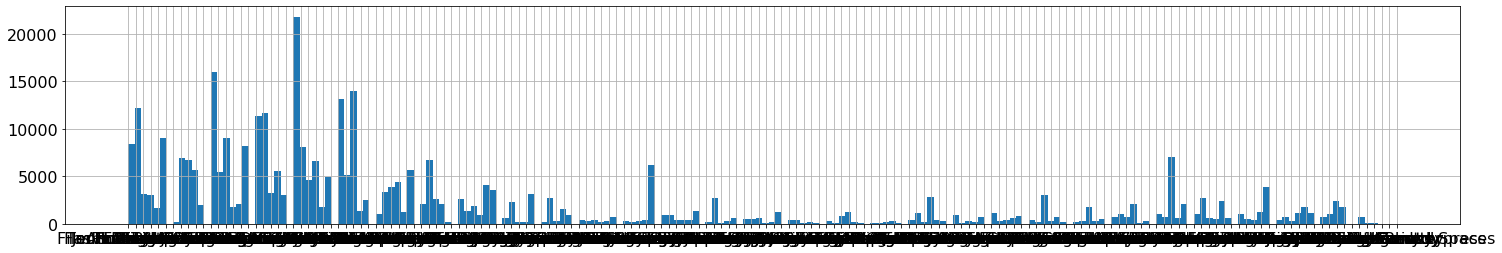

In [4]:
DF['main_category_and_category'].hist(figsize=(25, 4), bins=200)
plt.show()

Histogram krajów

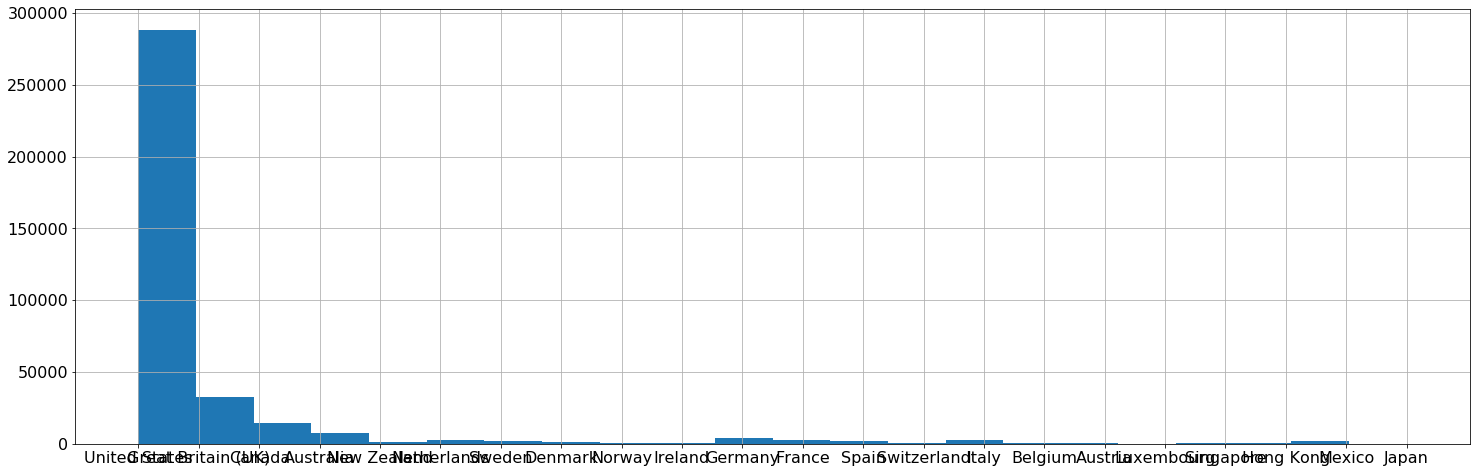

In [5]:
DF['country'].hist(figsize=(25, 8), bins=22)
plt.show()

Histogram czasu trwania kampanii

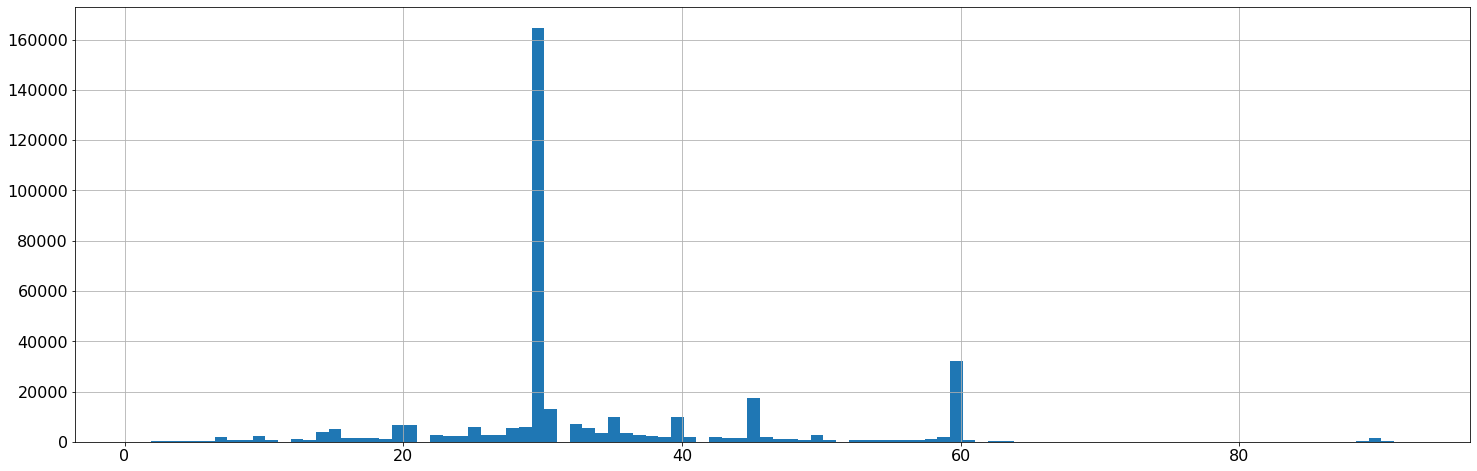

In [6]:
DF['duration'].hist(figsize=(25, 8), bins=100)
plt.show()

Histogram założonego celu

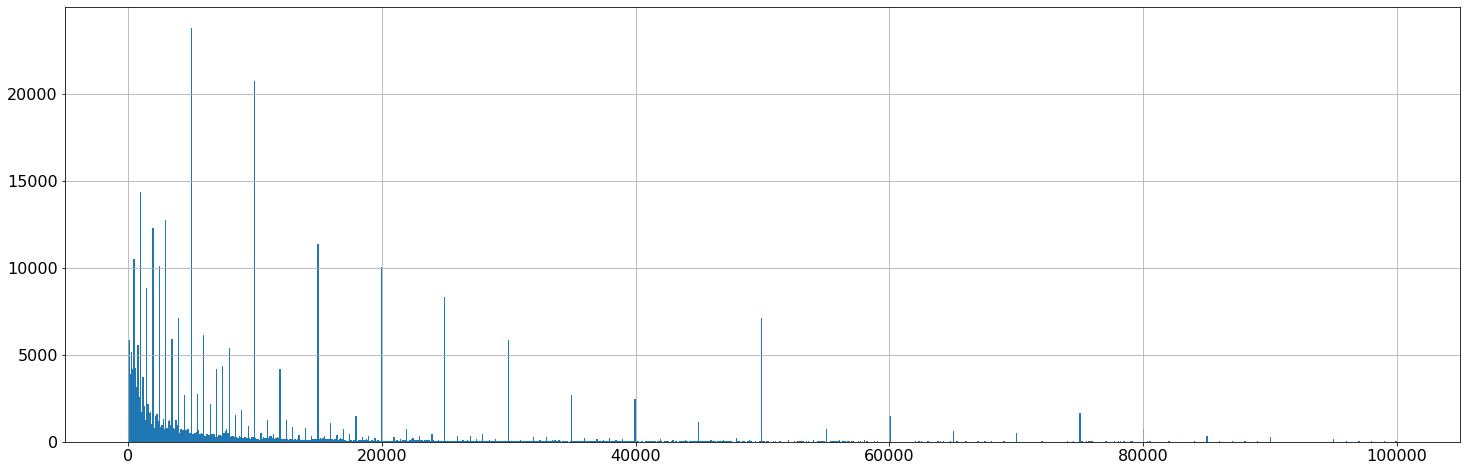

In [7]:
goal=DF['goal_in_usd']
goal[goal<100000].hist(figsize=(25, 8), bins=1000)
plt.show()

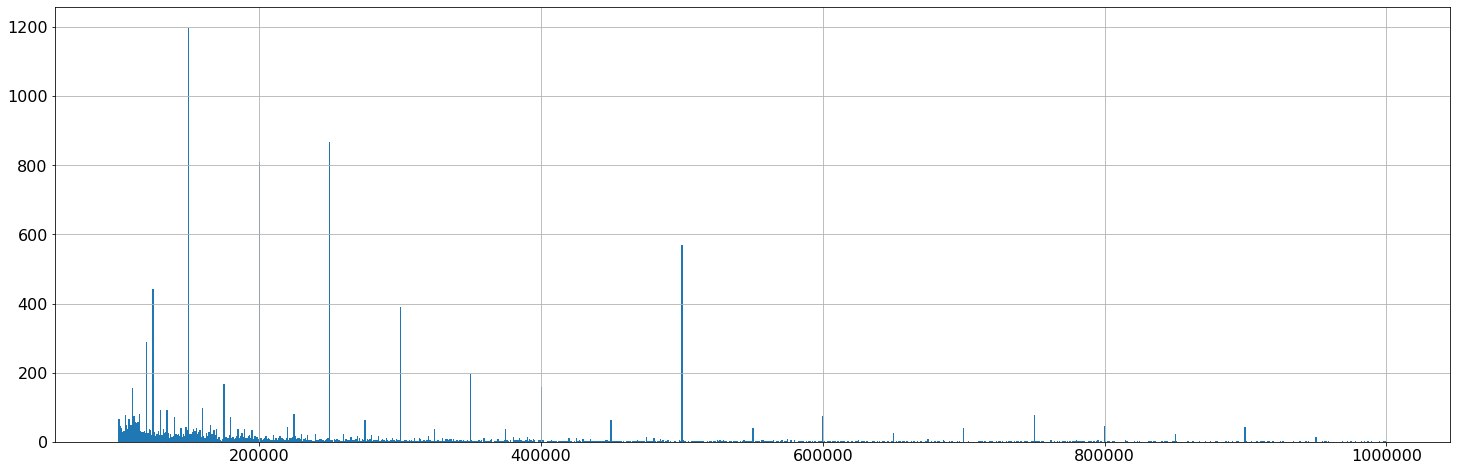

In [8]:
goal[(goal>100000) & (goal<1000000) ].hist(figsize=(25, 8), bins=1000)
plt.show()

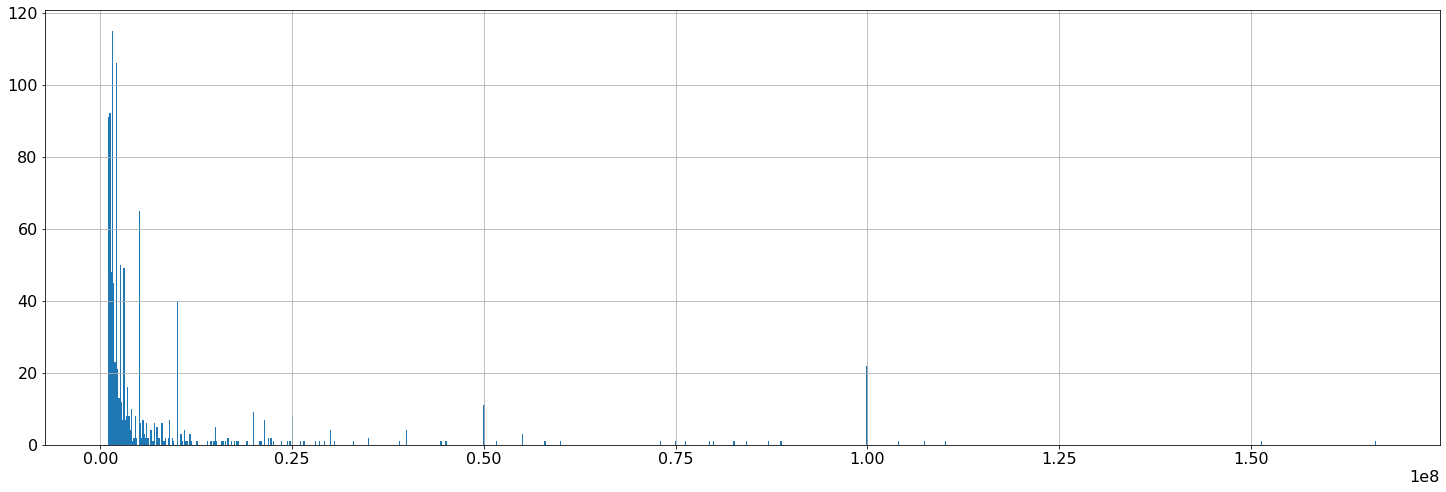

In [9]:
goal[goal>1000000 ].hist(figsize=(25, 8), bins=1000)
plt.show()

Więcej histogramów i poprawienie już zrobionych - nina

#### Na podstawie pliku na git wstępna_analiza_sql.sql mamy pokazać na wykresach współczynnik sukcesu w danych kategoriach (gdzie wsp='successful'/'successful'+'failed'+'canceled') i to ma być podział ze względu na:

* kategorie (paweł) done
* kategorie+podkategorie (paweł) done
* walute (nina) done
* kraj (nina) done
* euro+kraj (nina) done
* czas trwania kampanii (pobawić się w koszykowanie tak by na wykresie uzyskać jak najlepiej odwzorowane dane (nina)
* goal (pobawić się w koszykowanie tak by na wykresie uzyskać jak najlepiej odwzorowane dane) (paweł)
* miesiąc rozpoczęcia kampanii (paweł) done
* miesiąc zakończenia kampanii (paweł) done



#### Na podstawie pliku na git information_value_kickstarter.sql mamy pokazać na wykresach/wykresie inforamtion value dla różnych cech bazy (ogólnie zobaczyć jaka cecha najbardziej wpływa na ostateczny sukces projektu)

Współczynnik sukcesu ze względu na kategorie główną

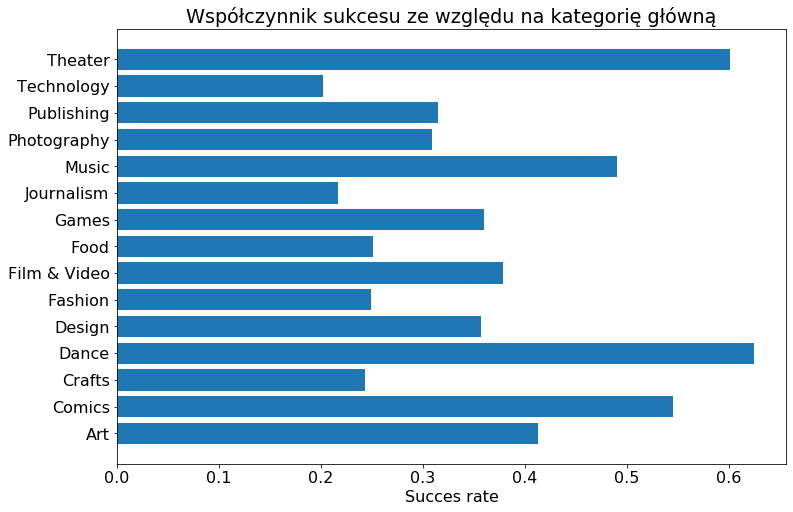

In [16]:
#grupujemy wartości na podstawie kategorii głównej
currency_state=DF.groupby('main_category')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na kategorię główną')
plt.show()

Współczynnik sukcesu ze względu na kategorię i podkategorię

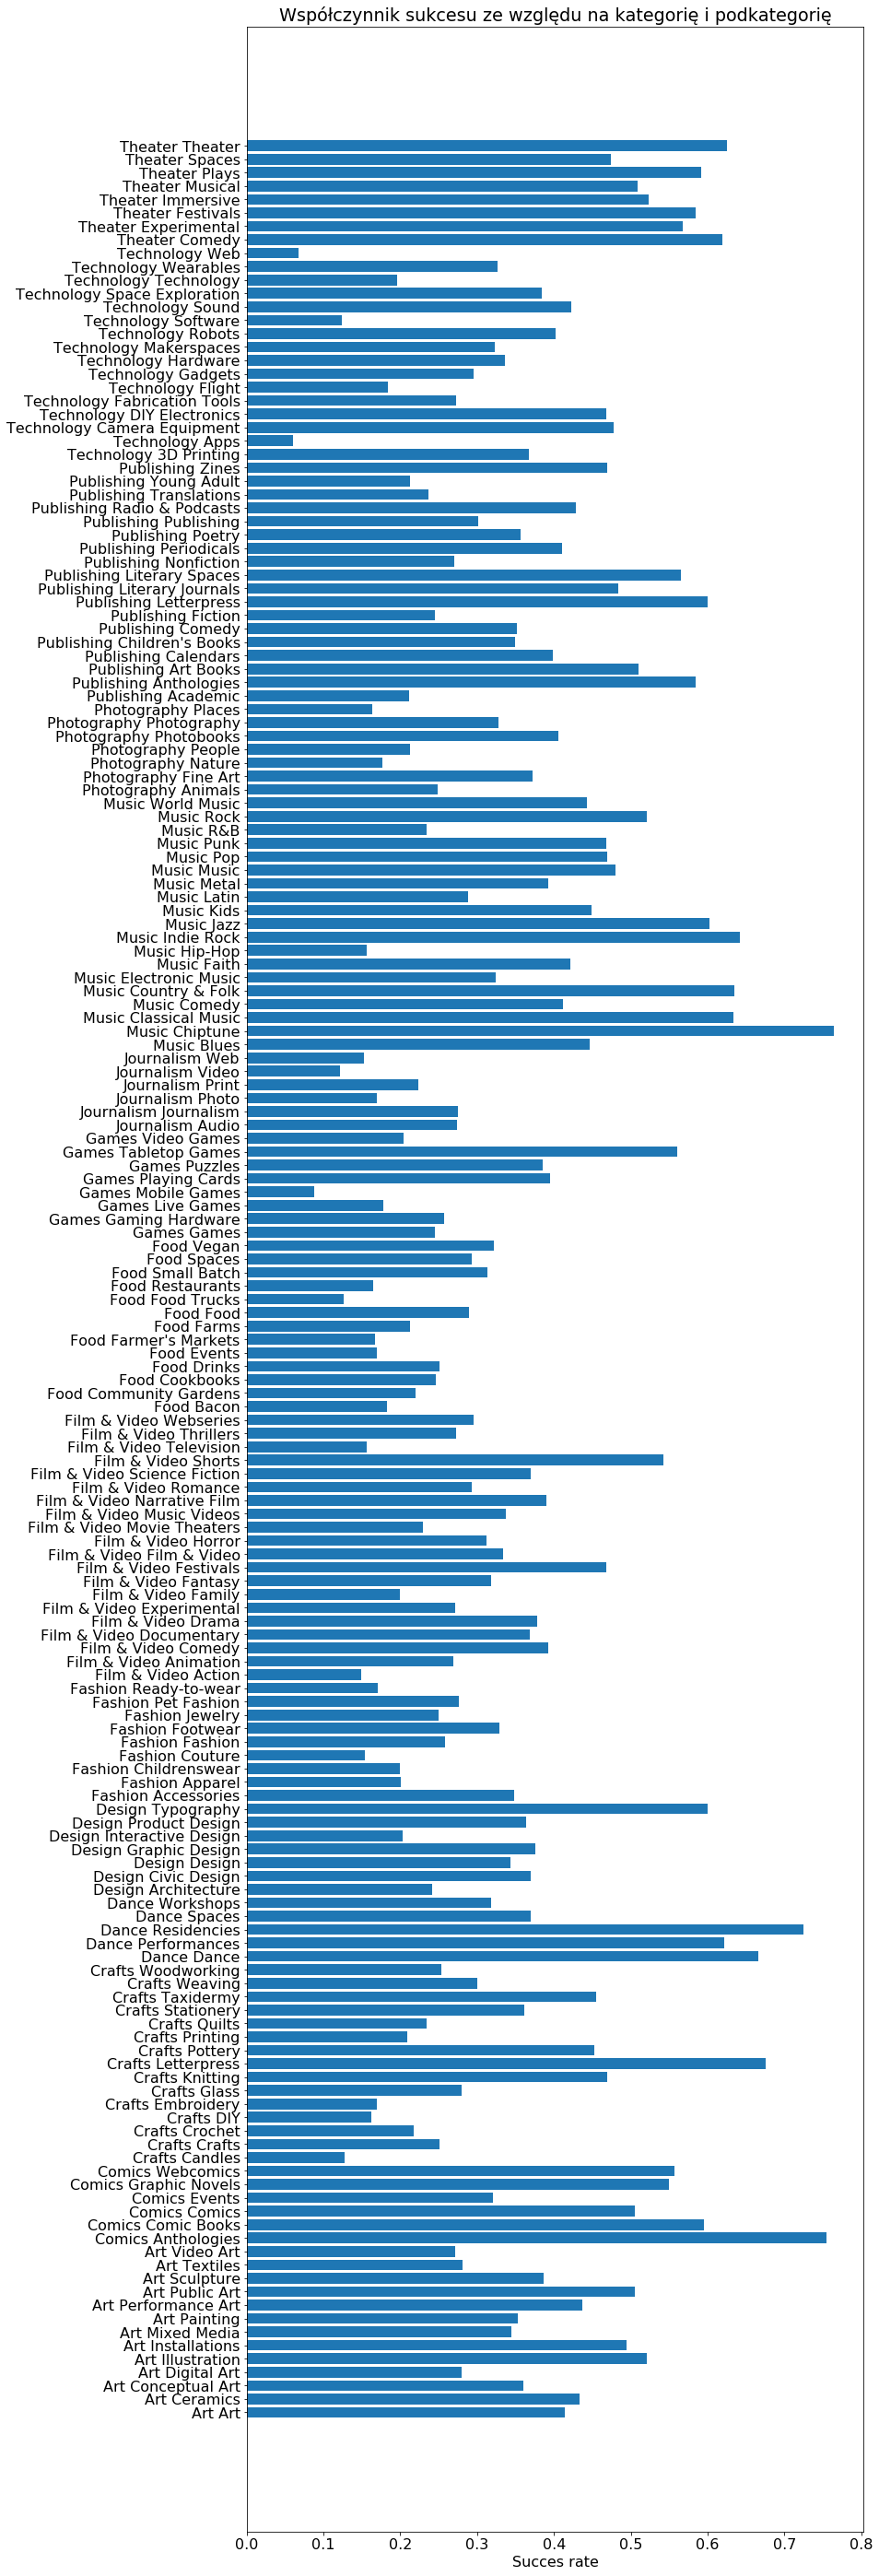

In [23]:
#grupujemy wartości na podstawie kategorii głównej i podkategorii
currency_state=DF.groupby('main_category_and_category')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 50))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na kategorię i podkategorię')
plt.show()

Współczynnik sukcesu ze względu na walutę

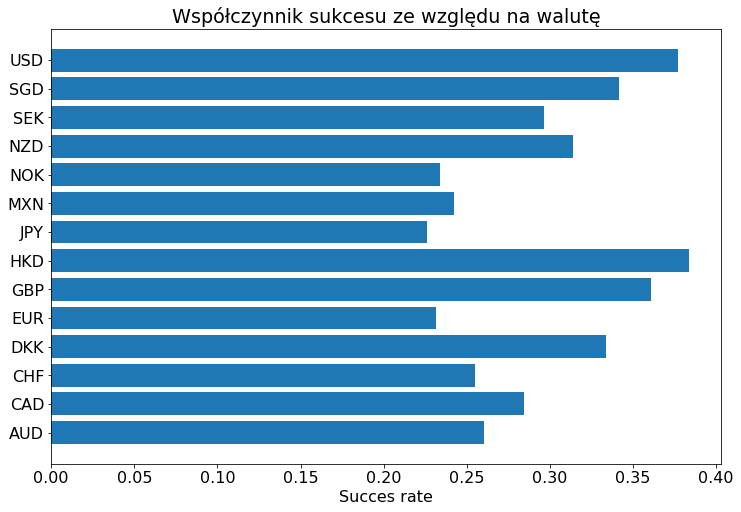

In [9]:
#grupujemy wartości na podstawie state
currency_state=DF.groupby('currency')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na walutę')
plt.show()

Współczynnik sukcesu ze względu na kraj

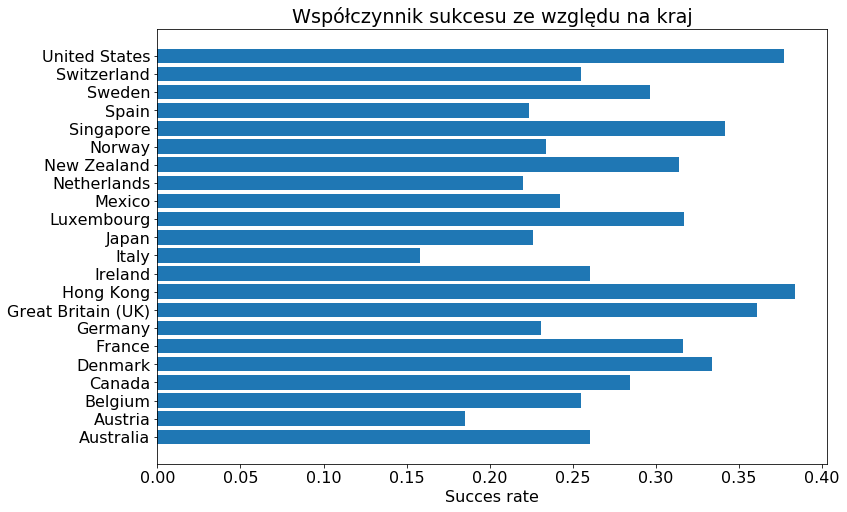

In [11]:
country_state=DF.groupby('country')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_country=country_state.index

for country in unique_country:
    good=country_state.at[country,'successful']
    bad=country_state.at[country,'failed']+country_state.at[country,'canceled']
    all_results=good+bad
    succes_rate[country]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na kraj')
plt.show()

Współczynnik sukcesu dla krajów, w których walutą jest euro

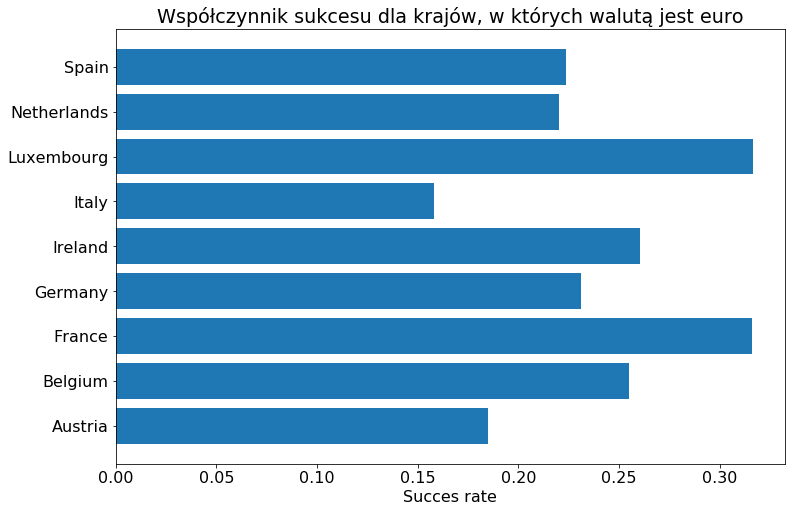

In [12]:
country_state=DF[DF['currency']=='EUR'].groupby('country')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_country=country_state.index

for country in unique_country:
    good=country_state.at[country,'successful']
    bad=country_state.at[country,'failed']+country_state.at[country,'canceled']
    all_results=good+bad
    succes_rate[country]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu dla krajów, w których walutą jest euro')
plt.show()

Współczynnik sukcesu wyliczony na podstawie długości trwania kampanii

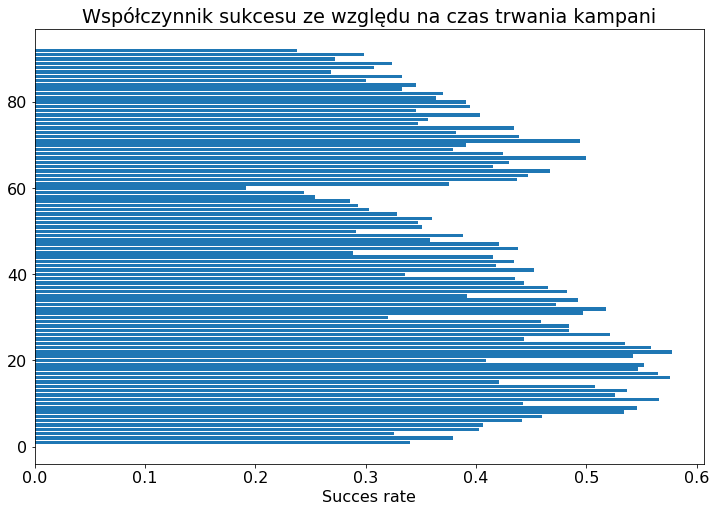

In [13]:
duration_state=DF.groupby('duration')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_duration=duration_state.index

for duration in unique_duration:
    good=duration_state.at[duration,'successful']
    bad=duration_state.at[duration,'failed']+duration_state.at[duration,'canceled']
    all_results=good+bad
    succes_rate[duration]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na czas trwania kampani')
plt.show()

Miesiąc rozpoczęcia kampanii

In [66]:
DF['launched_month']=DF['launched'].str.slice(start=5, stop=7, step=1)

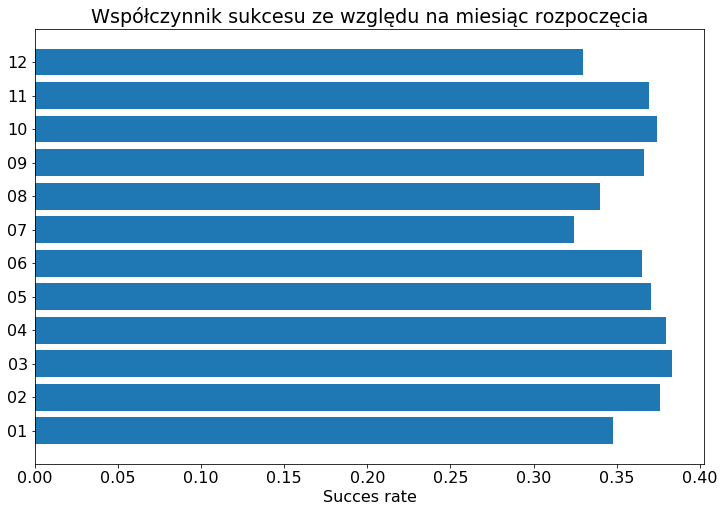

In [71]:
#grupujemy wartości na podstawie launched_month
currency_state=DF.groupby('launched_month')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na miesiąc rozpoczęcia')
plt.show()

Miesiąc zakończenia kampanii

In [69]:
DF['deadline_month']=DF['deadline'].str.slice(start=5, stop=7, step=1)

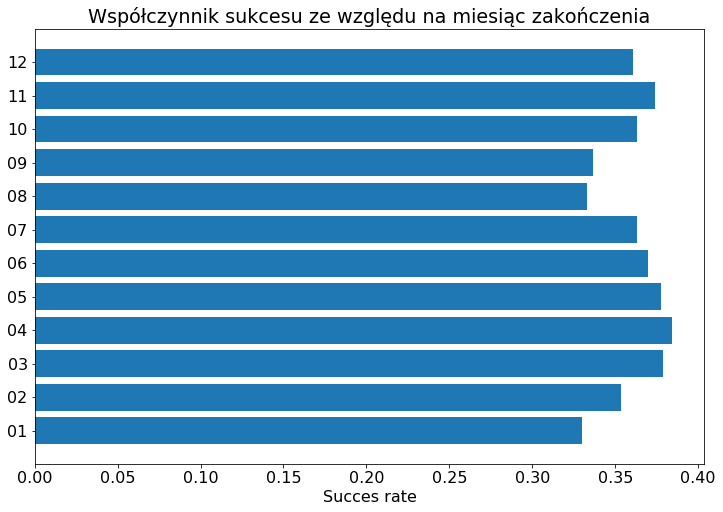

In [72]:
#grupujemy wartości na podstawie deadline_month
currency_state=DF.groupby('deadline_month')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y)
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na miesiąc zakończenia')
plt.show()

In [14]:
DF.columns

Index(['id', 'name', 'main_category', 'category', 'country', 'launched',
       'deadline', 'duration', 'currency', 'goal_in_defined_currency',
       'pledged_in_defined_currency', 'goal_in_usd', 'pledged_in_usd',
       'percentage_of_money_collected', 'backers', 'state',
       'main_category_and_category'],
      dtype='object')